In [1]:
import cv2 as cv

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [105]:
path = r"/home/zews/Downloads/real_imagex.jpg"

In [4]:
path2 = r"/home/zews/Downloads/shapex2.png"

In [25]:
pathNew = r"/home/zews/Pictures/Screenshot from 2021-01-28 18-19-35.png"

In [106]:
img = cv.imread(path)

In [21]:
cv.imshow("image",imgC)
key = cv.waitKey(0) # This is necessary to be required so that the image doesn't close immediately
if key == 27:
    cv.destroyAllWindows()

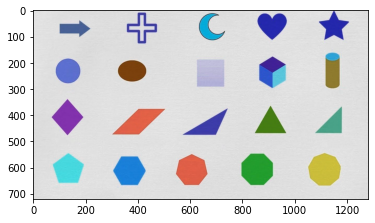

In [107]:
plt.imshow(img)

In [108]:
imgGrey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgBlur = cv.GaussianBlur(imgGrey, (15,15),1)
imgCanny = cv.Canny(imgGrey,50,100)
imgCanny1a = cv.Canny(imgGrey,50,50)
imgCannyBlur = cv.Canny(imgBlur,50,100)
#Canny after the blur gives best edges.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd2c4746ee0>)

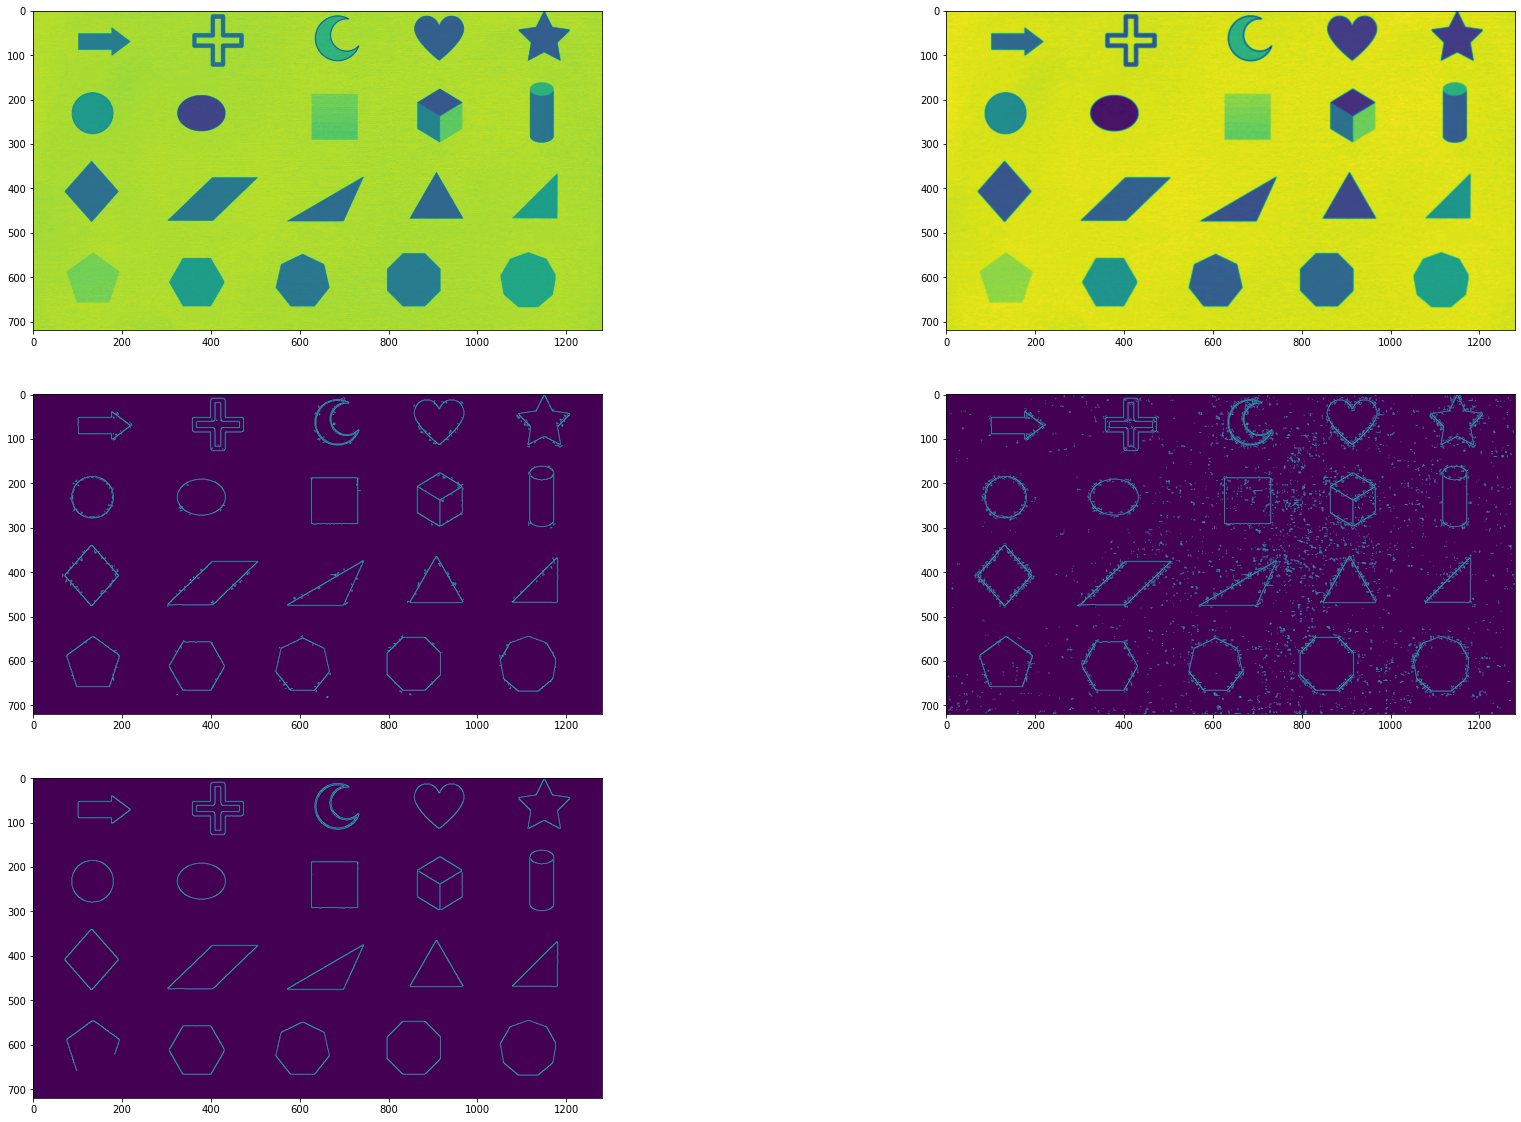

In [109]:
plt.figure(figsize=(30,20))
plt.subplot(321), plt.imshow(imgGrey)
plt.subplot(322), plt.imshow(imgBlur)
plt.subplot(323), plt.imshow(imgCanny)
plt.subplot(324), plt.imshow(imgCanny1a)
plt.subplot(325), plt.imshow(imgCannyBlur)

In [29]:
imgGrey = cv.cvtColor(imgR, cv.COLOR_RGB2GRAY)

NameError: name 'imgR' is not defined

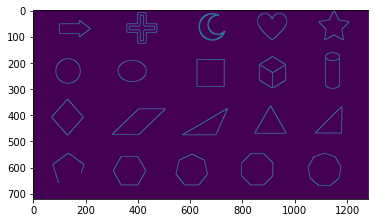

In [110]:
plt.imshow(imgCannyBlur)

In [31]:
imgGrey1 = cv.cvtColor(imgR, cv.COLOR_RGB2GRAY)
imgGrey2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.subplot(1,2,1), plt.imshow(imgGrey1)
plt.subplot(1,2,2), plt.imshow(imgGrey2)

NameError: name 'imgR' is not defined

In [9]:
imgC = imgCannyBlur.copy()
# imgC.

In [147]:
def getContour(img):
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    #three params(canny or threshold image, retrival mode, approximation)
    i = 0
    for cnt in contours:
        area = cv.contourArea(cnt)
        cv.drawContours(whiteimg,cnt,-1,(0,255,0),2)
        #params(background, shapes,looping, color, thickness)
        perimeter = cv.arcLength(cnt, True)
        approxPeri = cv.approxPolyDP(cnt,0.03*perimeter, True)
        sideNos = len(approxPeri)

        #true here if closed
        #check how this fuck is working
        x,y,w,h = cv.boundingRect(approxPeri)
        
        if sideNos==3:
            sideT = "Triangle"
        elif sideNos== 4:
            asRatio = w/float(h)
            if asRatio>0.95 and asRatio<1.05:
                sideT = "Square"
            else:
                sideT = "Rectangle"
        elif sideNos>4:
            sideT = "Circle"
        else:
            sideT = "None"
            
        cv.rectangle(whiteimg,(x,y),(x+w,y+h),(255,0,0),1)
        cv.circle(whiteimg, (x,y), radius=5, color=(0, 0, 0), thickness=-1)
#         cv.circle(whiteimg, (x,y), radius=5, color=(0, 0, 0), thickness=-1)
#         cv.circle(whiteimg, (x,y), radius=5, color=(0, 0, 0), thickness=-1)
        
        cv.putText(whiteimg,sideT+str(i),((x+(w//2)-10),(y+(h//2)-10)),cv.FONT_HERSHEY_COMPLEX_SMALL,1.4,(255,0,255),2,cv.LINE_AA)
        
        print(approxPeri,x,y,w,h, sideT+str(i))
        print(area, "{:.2f}".format(perimeter))
        i+=1

In [148]:
getContour(imgCannyBlur)

[[[336 558]]

 [[306 611]]

 [[329 654]]

 [[400 666]]

 [[430 612]]

 [[403 562]]] 306 558 125 109 Circle0
10309.5 394.78
[[[560 570]]

 [[548 628]]

 [[579 666]]

 [[633 666]]

 [[666 625]]

 [[655 572]]

 [[609 549]]] 548 549 119 118 Circle1
10551.5 394.92
[[[831 547]]

 [[796 583]]

 [[796 631]]

 [[831 666]]

 [[881 666]]

 [[916 631]]

 [[916 581]]

 [[881 547]]] 796 547 121 120 Circle2
11895.0 397.16
[[[1073  559]]

 [[1051  596]]

 [[1058  640]]

 [[1091  668]]

 [[1138  667]]

 [[1175  608]]

 [[1155  559]]

 [[1116  545]]] 1051 545 125 124 Circle3
11817.5 412.58
[[[135 545]]

 [[194 589]]

 [[183 620]]

 [[192 597]]

 [[132 546]]

 [[ 75 589]]

 [[ 98 658]]

 [[ 75 589]]] 75 545 120 114 Circle4
94.5 543.65
[[[505 376]]

 [[401 377]]

 [[303 473]]

 [[405 473]]

 [[505 378]]

 [[402 474]]

 [[304 471]]

 [[404 376]]] 303 376 203 99 Circle5
191.0 973.20
[[[743 375]]

 [[697 475]]

 [[572 474]]

 [[741 375]]

 [[572 475]]

 [[698 475]]] 572 375 172 101 Circle6
131.5 910.71
[[[11

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd2bfe6a430>)

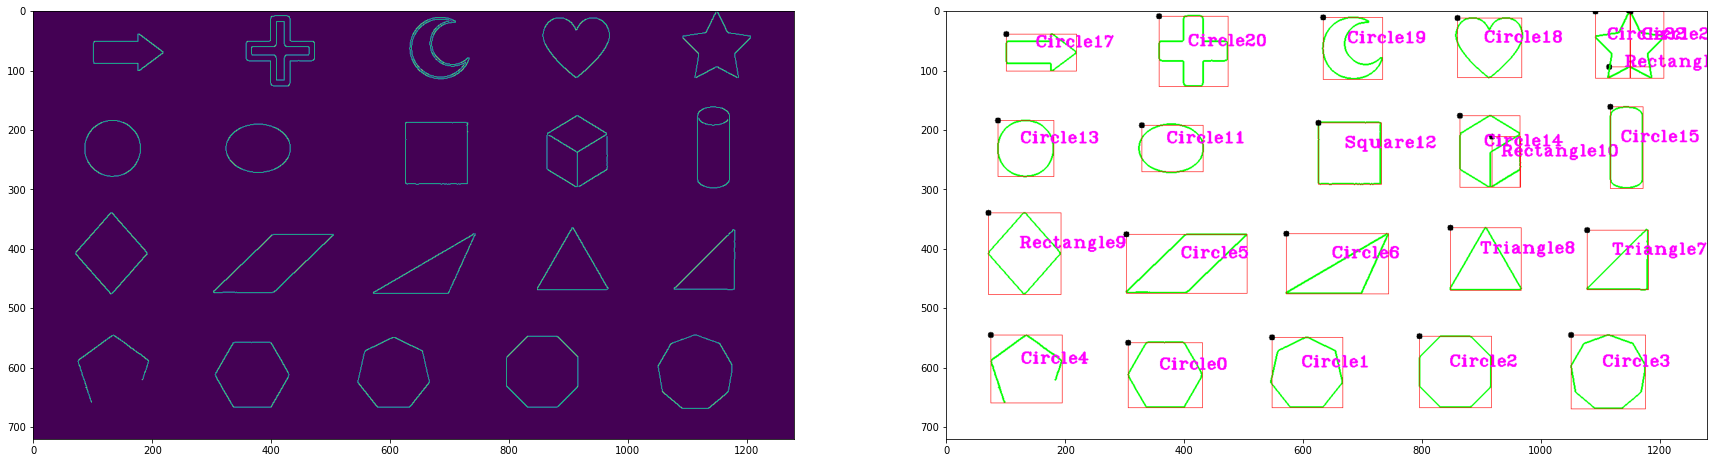

In [149]:
plt.figure(figsize=(30,20))
plt.subplot(121), plt.imshow(imgCannyBlur)
plt.subplot(122), plt.imshow(whiteimg)

In [111]:
imgCannyBlur.shape

(720, 1280)

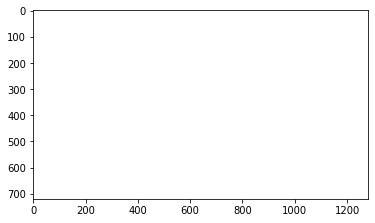

In [139]:
whiteimg = np.ones((720, 1280,3))
plt.imshow(whiteimg)